In [2]:
#import all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [3]:
#import the data
data = pd.read_csv('Categorical.csv')
data.head()

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,North America
1,Afghanistan,66.004734,33.835231,Asia
2,Angola,17.537368,-12.293361,Africa
3,Anguilla,-63.064989,18.223959,North America
4,Albania,20.049834,41.142450,Europe


In [6]:
data['continent'].unique()

array(['North America', 'Asia', 'Africa', 'Europe', 'South America',
       'Oceania', 'Antarctica', 'Seven seas (open ocean)'], dtype=object)

In [ ]:
data

<h4>Here we have to make cluster according to the continent. So we have to map the values of the continent to some value.

#Map the data

In [30]:
data_mapped = data.copy()
data_mapped['continent'] = data_mapped['continent'].map({'North America' : 0, 'Asia':1,'Europe':2,'Africa':3,'Oceania':4,'South America':5,'Antarctica':6,'Seven seas (open ocean)':7})
data_mapped

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,0
1,Afghanistan,66.004734,33.835231,1
2,Angola,17.537368,-12.293361,3
3,Anguilla,-63.064989,18.223959,0
4,Albania,20.049834,41.142450,2
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,4
237,Yemen,47.586762,15.909280,1
238,South Africa,25.083901,-29.000341,3
239,Zambia,27.774759,-13.458242,3


# Select the features


In [32]:
X = data_mapped.iloc[:,3:4]
X

,continent
0,0
1,1
2,3
3,0
4,2
...,...
236,4
237,1
238,3
239,3


#Clustering 

In [48]:
kmeans = KMeans(8)
kmeans.fit(X)

KMeans()

In [49]:
identified_cluster = kmeans.fit_predict(X)
identified_cluster

array([3, 2, 4, 3, 0, 0, 0, 2, 1, 2, 6, 7, 6, 5, 3, 6, 0, 2, 4, 0, 4, 4,
       2, 0, 2, 3, 3, 0, 3, 0, 3, 3, 1, 1, 3, 2, 2, 4, 4, 0, 1, 2, 4, 4,
       4, 4, 6, 1, 4, 4, 3, 3, 3, 3, 2, 2, 0, 0, 4, 3, 0, 3, 4, 1, 4, 4,
       0, 0, 4, 0, 6, 1, 0, 0, 6, 4, 0, 2, 0, 4, 4, 4, 4, 4, 0, 3, 3, 3,
       6, 1, 2, 5, 3, 0, 3, 0, 2, 0, 2, 2, 5, 0, 2, 2, 0, 2, 0, 3, 0, 2,
       2, 2, 2, 4, 2, 2, 6, 3, 2, 0, 2, 2, 2, 4, 4, 3, 0, 2, 4, 0, 0, 0,
       2, 3, 4, 0, 0, 4, 5, 3, 6, 0, 4, 0, 2, 0, 2, 6, 4, 4, 3, 5, 4, 2,
       4, 6, 4, 6, 4, 3, 6, 0, 0, 2, 6, 6, 2, 2, 3, 6, 1, 2, 6, 6, 0, 3,
       2, 0, 1, 2, 6, 2, 0, 0, 4, 4, 2, 4, 4, 4, 2, 5, 5, 6, 4, 3, 0, 4,
       4, 3, 0, 4, 1, 0, 0, 0, 4, 3, 5, 2, 3, 4, 4, 2, 2, 2, 2, 6, 3, 4,
       2, 2, 4, 4, 0, 1, 3, 2, 0, 3, 1, 3, 3, 2, 6, 6, 6, 2, 4, 4, 4],
      dtype=int32)

In [50]:
data_with_cluster = data_mapped.copy()
data_with_cluster['cluster'] = identified_cluster
data_with_cluster

,name,Longitude,Latitude,continent,cluster
0,Aruba,-69.982677,12.520880,0,3
1,Afghanistan,66.004734,33.835231,1,2
2,Angola,17.537368,-12.293361,3,4
3,Anguilla,-63.064989,18.223959,0,3
4,Albania,20.049834,41.142450,2,0
...,...,...,...,...,...
236,Samoa,-172.164851,-13.753243,4,6
237,Yemen,47.586762,15.909280,1,2
238,South Africa,25.083901,-29.000341,3,4
239,Zambia,27.774759,-13.458242,3,4


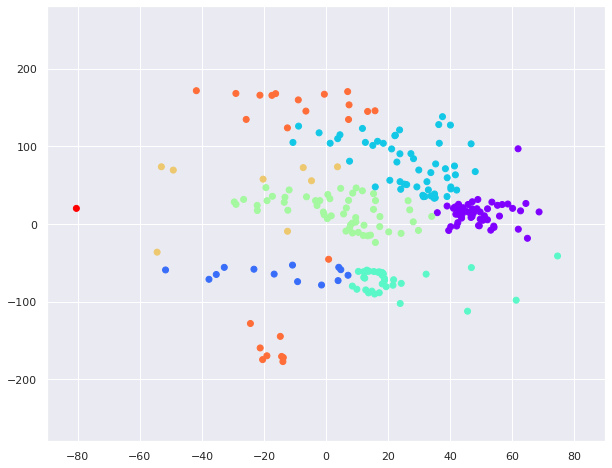

In [51]:
plt.figure(figsize=(10,8))
plt.scatter(data_with_cluster['Latitude'],data_with_cluster['Longitude'],c = data_with_cluster['cluster'],cmap = 'rainbow')
plt.xlim(-90,90)
plt.ylim(-280,280)
plt.show()